In [23]:

import pandas as pd
import re
import spacy
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem import PorterStemmer

In [3]:
# ----------------------------------------
# 1. VERƒ∞ Y√úKLEME
# ----------------------------------------
cv_df = pd.read_csv("cv_dataset.csv")
job_df = pd.read_csv("job_postings.csv")

In [5]:
# ƒ∞lk 5 satƒ±rƒ± g√∂r√ºnt√ºle
print("üîπ CV Verisi:")
display(cv_df.head())

üîπ CV Verisi:


ad_soyad                           email  \
0              Dr. Vaysal T√ºrk            erginel55@migros.net   
1        Bergen G√∂k Zorlu Aksu  dilsitanzengin@camurcuoglu.biz   
2               Tayaydƒ±n Sezer         zalihabilir@hotmail.com   
3  Dr. Seracettin Jankat G√ºlen                 rduran@bim.info   
4        T√ºrcan Saire Yƒ±ldƒ±rƒ±m            ademirel@arcelik.net   

                 telefon                                    yetenekler  \
0             Bilinmiyor                      React,TensorFlow,C#,HTML   
1   +90(247)216-6137x165       TensorFlow,CSS,React,Python,Django,HTML   
2        +90(663)3518180   JavaScript,Python,SQL,React,TensorFlow,HTML   
3  +90(775)491-6906x2160  JavaScript,HTML,Django,React,Java,TensorFlow   
4        +90(069)4591436                       Python,React,JavaScript   

   tecrube_yil         egitim  \
0         20.0      √ñn Lisans   
1         18.0         Lisans   
2         17.0           Lise   
3          9.0      √ñn Lisans   
4          3.0  Y√ºksek Lisans   

                                             on_yazi  
0  Yeni teknolojileri √∂ƒürenmeye hevesli ve hƒ±zlƒ± ...  
1  Takƒ±m √ßalƒ±≈ümasƒ±na uygun, √∂ƒürenmeye a√ßƒ±k ve sor...  
2  Takƒ±m √ßalƒ±≈ümasƒ±na uygun, √∂ƒürenmeye a√ßƒ±k ve sor...  
3  ƒ∞lgili alandaki tecr√ºbelerim ve becerilerim do...  
4                                   Bilgi verilmemi≈ü

In [7]:
print("üîπ ƒ∞≈ü ƒ∞lanƒ± Verisi:")
display(job_df.head())

üîπ ƒ∞≈ü ƒ∞lanƒ± Verisi:


pozisyon          sirket          sehir  \
0            Veri Analisti  B√ºy√ºkVeri Ltd.  Belirtilmemi≈ü   
1           Veri M√ºhendisi        Mobilify          Bursa   
2       Frontend Developer     KodaYazƒ±lƒ±m      Eski≈üehir   
3  Makine √ñƒürenmesi Uzmanƒ±        Techsoft         Ankara   
4     Python Geli≈ütiricisi     KodaYazƒ±lƒ±m        Kocaeli   

                                            aciklama  \
0  Frontend projelerinde g√∂rev alacak, React ve J...   
1  Frontend projelerinde g√∂rev alacak, React ve J...   
2  Makine √∂ƒürenmesi projelerinde √ßalƒ±≈üacak, Tenso...   
3  Frontend projelerinde g√∂rev alacak, React ve J...   
4                                      Belirtilmemi≈ü   

                                       gereksinimler  
0  √úniversitelerin ilgili b√∂l√ºmlerinden mezun olm...  
1  Yeni teknolojileri √∂ƒürenmeye a√ßƒ±klƒ±k, Problem ...  
2  Yeni teknolojileri √∂ƒürenmeye a√ßƒ±klƒ±k, Takƒ±m √ßa...  
3  En az 3 yƒ±l yazƒ±lƒ±m geli≈ütirme deneyimi, Yeni ...  
4  En az 3 yƒ±l yazƒ±lƒ±m geli≈ütirme deneyimi, √únive...

In [9]:
# S√ºtun bilgileri
print("üîπ CV Veri Seti S√ºtunlarƒ±:", cv_df.columns.tolist())
print("üîπ ƒ∞lan Veri Seti S√ºtunlarƒ±:", job_df.columns.tolist())


üîπ CV Veri Seti S√ºtunlarƒ±: ['ad_soyad', 'email', 'telefon', 'yetenekler', 'tecrube_yil', 'egitim', 'on_yazi']
üîπ ƒ∞lan Veri Seti S√ºtunlarƒ±: ['pozisyon', 'sirket', 'sehir', 'aciklama', 'gereksinimler']


In [11]:
# Satƒ±r sayƒ±larƒ±
print(f"CV veri seti satƒ±r sayƒ±sƒ±: {len(cv_df)}")
print(f"ƒ∞lan veri seti satƒ±r sayƒ±sƒ±: {len(job_df)}")

CV veri seti satƒ±r sayƒ±sƒ±: 4998
ƒ∞lan veri seti satƒ±r sayƒ±sƒ±: 5200


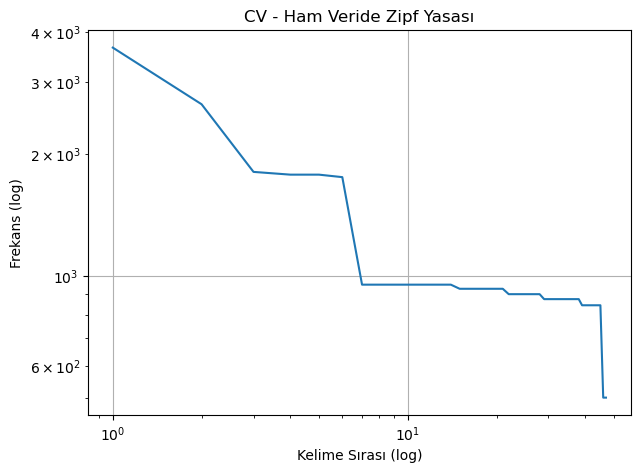

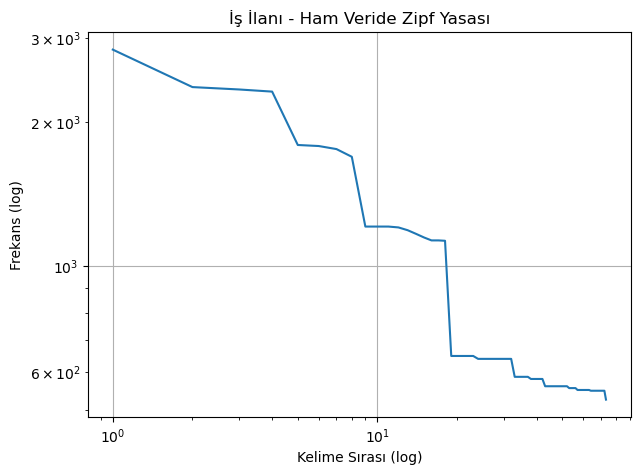

In [15]:
# ----------------------------------------
# 2. ZIPF YASASI - HAM VERƒ∞
# ----------------------------------------

def temizle_metni(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z√ßƒüƒ±√∂≈ü√º\s]", "", text)
    return text

def zipf_plot(freq_dict, title):
    freqs = list(freq_dict.values())
    freqs.sort(reverse=True)
    ranks = range(1, len(freqs) + 1)
    plt.figure(figsize=(7,5))
    plt.loglog(ranks, freqs)
    plt.title(title)
    plt.xlabel("Kelime Sƒ±rasƒ± (log)")
    plt.ylabel("Frekans (log)")
    plt.grid(True)
    plt.show()

cv_text_raw = " ".join(cv_df["on_yazi"].map(temizle_metni))
job_text_raw = " ".join(job_df["aciklama"].map(temizle_metni))

cv_freq = Counter(cv_text_raw.split())
job_freq = Counter(job_text_raw.split())

zipf_plot(cv_freq, "CV - Ham Veride Zipf Yasasƒ±")
zipf_plot(job_freq, "ƒ∞≈ü ƒ∞lanƒ± - Ham Veride Zipf Yasasƒ±")


In [25]:
# ----------------------------------------
# 3. LEMMATIZATION & STEMMING
# ----------------------------------------

stop_words = set(stopwords.words("turkish"))
stemmer = PorterStemmer()  # Snowball yerine Porter kullan

stop_words = set(stopwords.words("turkish"))

def preprocess_sentence_tr(sentence):
    tokens = word_tokenize(str(sentence), language="turkish")
    filtered_tokens = [token.lower() for token in tokens if token.isalpha() and token.lower() not in stop_words]
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    return filtered_tokens, stemmed_tokens,

def uygulamali_temizleme(df, column):
    lemma_corpus, stem_corpus = [], []

    for cumle in df[column].tolist():
        lemma, stem = preprocess_sentence_tr(cumle)
        lemma_corpus.append(lemma)
        stem_corpus.append(stem)

    df_lemma = pd.DataFrame({column: [" ".join(l) for l in lemma_corpus]})
    df_stem = pd.DataFrame({column: [" ".join(s) for s in stem_corpus]})
    return df_lemma, df_stem

cv_lemma_df, cv_stem_df = uygulamali_temizleme(cv_df, "on_yazi")
job_lemma_df, job_stem_df = uygulamali_temizleme(job_df, "aciklama")

cv_lemma_df.to_csv("cv_lemmatized.csv", index=False)
cv_stem_df.to_csv("cv_stemmed.csv", index=False)
job_lemma_df.to_csv("job_lemmatized.csv", index=False)
job_stem_df.to_csv("job_stemmed.csv", index=False)

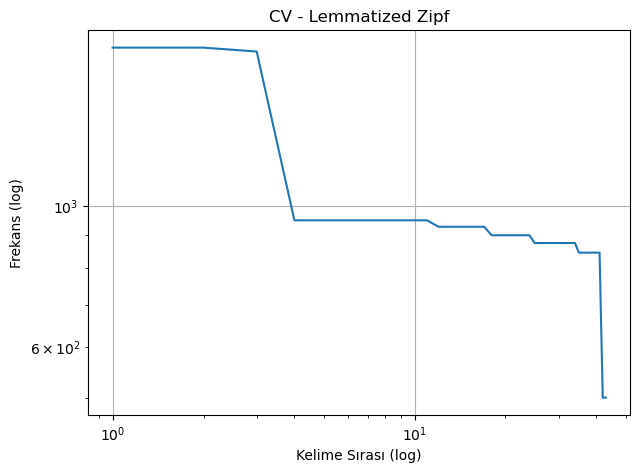

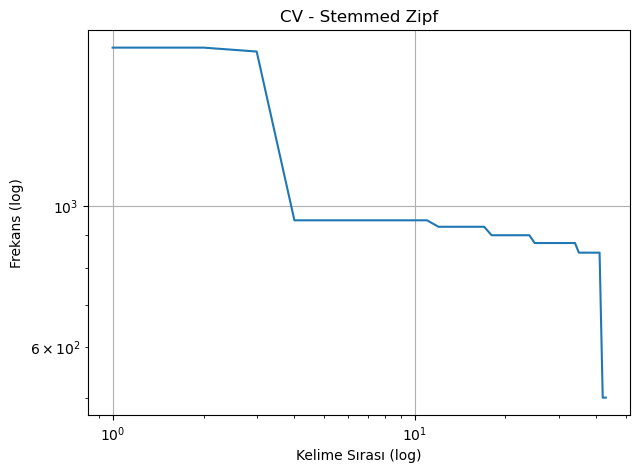

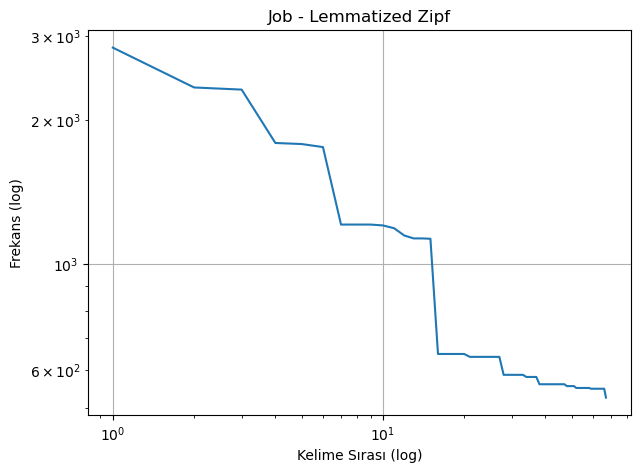

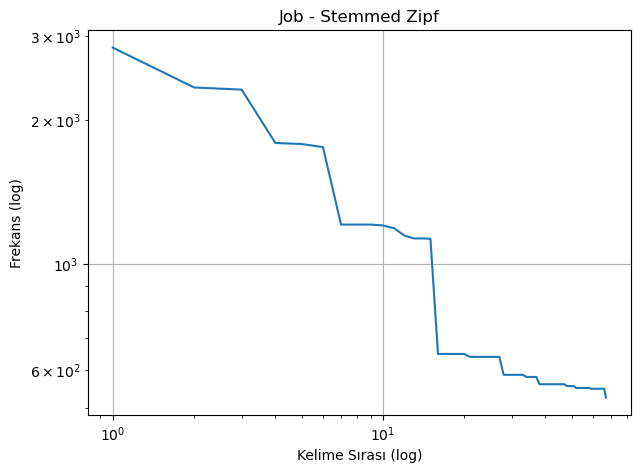

In [27]:
# ----------------------------------------
# 4. ZIPF - TEMƒ∞ZLENMƒ∞≈û VERƒ∞
# ----------------------------------------

zipf_plot(Counter(" ".join(cv_lemma_df["on_yazi"]).split()), "CV - Lemmatized Zipf")
zipf_plot(Counter(" ".join(cv_stem_df["on_yazi"]).split()), "CV - Stemmed Zipf")
zipf_plot(Counter(" ".join(job_lemma_df["aciklama"]).split()), "Job - Lemmatized Zipf")
zipf_plot(Counter(" ".join(job_stem_df["aciklama"]).split()), "Job - Stemmed Zipf")

In [29]:
# ----------------------------------------
# 5. TF-IDF VEKT√ñRLE≈ûTƒ∞RME (STEMMED VERƒ∞LER √úZERƒ∞NDE)
# ----------------------------------------

def tfidf_vektorle≈ütir(df, metin_sutunu, output_path):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(df[metin_sutunu])
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
    tfidf_df.to_csv(output_path, index=False)
    return tfidf_df

# Sadece stemmed veriler ba≈üarƒ±lƒ± olduƒüu i√ßin onlarƒ± kullanƒ±yoruz
tfidf_cv_stem = tfidf_vektorle≈ütir(cv_stem_df, "on_yazi", "tfidf_stemmed_cv.csv")
tfidf_job_stem = tfidf_vektorle≈ütir(job_stem_df, "aciklama", "tfidf_stemmed_job.csv")

In [31]:
def train_and_save_model(corpus, params, model_name_prefix):
    model = Word2Vec(
        sentences=corpus,
        vector_size=params["vector_size"],
        window=params["window"],
        min_count=1,
        sg=1 if params["model_type"] == "skipgram" else 0
    )
    model_name = f"{model_name_prefix}_{params['model_type']}_window{params['window']}_dim{params['vector_size']}.model"
    model.save(model_name)
    print(f"‚úÖ {model_name} modeli kaydedildi.")

In [35]:
parameters = [
    {'model_type': 'cbow', 'window': 2, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 2, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 300},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 300}
]

In [37]:
# C√ºmle listelerini tekrar tokenize edilmi≈ü haliyle olu≈ütur
cv_lemma_corpus = [sentence.split() for sentence in cv_lemma_df["on_yazi"].dropna()]
cv_stem_corpus = [sentence.split() for sentence in cv_stem_df["on_yazi"].dropna()]
job_lemma_corpus = [sentence.split() for sentence in job_lemma_df["aciklama"].dropna()]
job_stem_corpus = [sentence.split() for sentence in job_stem_df["aciklama"].dropna()]

In [39]:
# Lemmatized modelleri eƒüit
for param in parameters:
    train_and_save_model(cv_lemma_corpus, param, "cv_lemmatized_model")
    train_and_save_model(job_lemma_corpus, param, "job_lemmatized_model")

# Stemmed modelleri eƒüit
for param in parameters:
    train_and_save_model(cv_stem_corpus, param, "cv_stemmed_model")
    train_and_save_model(job_stem_corpus, param, "job_stemmed_model")

‚úÖ cv_lemmatized_model_cbow_window2_dim100.model modeli kaydedildi.
‚úÖ job_lemmatized_model_cbow_window2_dim100.model modeli kaydedildi.
‚úÖ cv_lemmatized_model_skipgram_window2_dim100.model modeli kaydedildi.
‚úÖ job_lemmatized_model_skipgram_window2_dim100.model modeli kaydedildi.
‚úÖ cv_lemmatized_model_cbow_window4_dim100.model modeli kaydedildi.
‚úÖ job_lemmatized_model_cbow_window4_dim100.model modeli kaydedildi.
‚úÖ cv_lemmatized_model_skipgram_window4_dim100.model modeli kaydedildi.
‚úÖ job_lemmatized_model_skipgram_window4_dim100.model modeli kaydedildi.
‚úÖ cv_lemmatized_model_cbow_window2_dim300.model modeli kaydedildi.
‚úÖ job_lemmatized_model_cbow_window2_dim300.model modeli kaydedildi.
‚úÖ cv_lemmatized_model_skipgram_window2_dim300.model modeli kaydedildi.
‚úÖ job_lemmatized_model_skipgram_window2_dim300.model modeli kaydedildi.
‚úÖ cv_lemmatized_model_cbow_window4_dim300.model modeli kaydedildi.
‚úÖ job_lemmatized_model_cbow_window4_dim300.model modeli kaydedildi.
‚úÖ

In [41]:

def print_similar_words(model_path, keyword):
    model = Word2Vec.load(model_path)
    print(f"üìå Model: {model_path}")
    try:
        similar = model.wv.most_similar(keyword, topn=5)
        for word, score in similar:
            print(f"  ‚û§ {word} (Benzerlik: {score:.4f})")
    except KeyError:
        print(f"  ‚ùó '{keyword}' kelimesi modelde bulunamadƒ±.")
    print("\n")

In [43]:
print_similar_words("cv_stemmed_model_skipgram_window4_dim300.model", "veri")
print_similar_words("cv_lemmatized_model_cbow_window2_dim100.model", "python")
print_similar_words("cv_stemmed_model_cbow_window2_dim100.model", "takƒ±m")


üìå Model: cv_stemmed_model_skipgram_window4_dim300.model
  ‚ùó 'veri' kelimesi modelde bulunamadƒ±.


üìå Model: cv_lemmatized_model_cbow_window2_dim100.model
  ‚ùó 'python' kelimesi modelde bulunamadƒ±.


üìå Model: cv_stemmed_model_cbow_window2_dim100.model
  ‚û§ sahibi (Benzerlik: 0.9957)
  ‚û§ √ßalƒ±≈ümasƒ±na (Benzerlik: 0.9953)
  ‚û§ a√ßƒ±k (Benzerlik: 0.9951)
  ‚û§ sorumluluk (Benzerlik: 0.9944)
  ‚û§ uygun (Benzerlik: 0.9884)




In [45]:
# En ba≈üarƒ±lƒ± modelin y√ºklenmesi
model = Word2Vec.load("cv_stemmed_model_cbow_window2_dim100.model")

In [47]:

# Vekt√∂re d√∂n√º≈üt√ºrme fonksiyonu
def text_to_vector(text, model):
    words = text.split()
    word_vecs = [model.wv[word] for word in words if word in model.wv]
    return np.mean(word_vecs, axis=0) if word_vecs else np.zeros(model.vector_size)

In [49]:
# CV ve ilan vekt√∂rlerini hesapla
cv_vectors = cv_stem_df["on_yazi"].apply(lambda x: text_to_vector(x, model)).tolist()
job_vectors = job_stem_df["aciklama"].apply(lambda x: text_to_vector(x, model)).tolist()

In [51]:
# ----------------------------------------
# 7. E≈ûLE≈ûME ANALƒ∞Zƒ∞
# ----------------------------------------

top_matches = {}

for i, job_vec in enumerate(job_vectors):
    sims = cosine_similarity([job_vec], cv_vectors)[0]
    top_5 = np.argsort(sims)[-5:][::-1]
    top_matches[i] = list(zip(top_5, sims[top_5]))

In [53]:
# √ñrnek √ßƒ±ktƒ±
for job_id in range(3):
    print(f"\nüîπ ƒ∞lan {job_id} i√ßin en uygun 5 CV:")
    for cv_index, score in top_matches[job_id]:
        isim = cv_df.iloc[cv_index]["ad_soyad"]
        print(f"  ‚û§ {isim} | Benzerlik Skoru: {score:.4f}")


üîπ ƒ∞lan 0 i√ßin en uygun 5 CV:
  ‚û§ Siti Misra Demir | Benzerlik Skoru: 0.9746
  ‚û§ Dr. Alaz Fayize Erdoƒüan | Benzerlik Skoru: 0.9746
  ‚û§ U√ßan Sakarya | Benzerlik Skoru: 0.9746
  ‚û§ Bilginur ≈ûener | Benzerlik Skoru: 0.9746
  ‚û§ Bay Tanƒ±r Haluk Aslan | Benzerlik Skoru: 0.9746

üîπ ƒ∞lan 1 i√ßin en uygun 5 CV:
  ‚û§ Siti Misra Demir | Benzerlik Skoru: 0.9746
  ‚û§ Dr. Alaz Fayize Erdoƒüan | Benzerlik Skoru: 0.9746
  ‚û§ U√ßan Sakarya | Benzerlik Skoru: 0.9746
  ‚û§ Bilginur ≈ûener | Benzerlik Skoru: 0.9746
  ‚û§ Bay Tanƒ±r Haluk Aslan | Benzerlik Skoru: 0.9746

üîπ ƒ∞lan 2 i√ßin en uygun 5 CV:
  ‚û§ Meleknur Mansƒ±z Tarhan | Benzerlik Skoru: 0.9967
  ‚û§ Dr. G√ºld√ºnya Ceyhun Yorulmaz | Benzerlik Skoru: 0.9967
  ‚û§ Oƒüuzman Saydam √úlker Dumanlƒ± | Benzerlik Skoru: 0.9967
  ‚û§ Dr. Alaz Fayize Erdoƒüan | Benzerlik Skoru: 0.9967
  ‚û§ Atnan Hayali Bilge | Benzerlik Skoru: 0.9967
